In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from datetime import datetime
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

In [3]:
resale_hdb = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [4]:
resale_hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
resale_hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161089 entries, 0 to 161088
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                161089 non-null  object 
 1   town                 161089 non-null  object 
 2   flat_type            161089 non-null  object 
 3   block                161089 non-null  object 
 4   street_name          161089 non-null  object 
 5   storey_range         161089 non-null  object 
 6   floor_area_sqm       161089 non-null  float64
 7   flat_model           161089 non-null  object 
 8   lease_commence_date  161089 non-null  int64  
 9   remaining_lease      161089 non-null  object 
 10  resale_price         161089 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.5+ MB


In [6]:
resale_hdb.shape

(161089, 11)

## Data Clean Up


### Check for any null values

In [7]:
resale_hdb.isnull().any().sum()

0

### Check for any duplicated rows

In [8]:
resale_hdb.duplicated().sum()

275

In [9]:
resale_hdb[resale_hdb.duplicated(keep=False)].head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0


There is a total of 275 rows with duplicate values. Duplicates are not removed as there is no specific reasons and its not verified.

### Summary statistics

In [10]:
resale_hdb.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,161089.000000,161089.000000,1.610890e+05
mean,97.409674,1995.735295,4.866201e+05
std,24.039372,13.871006,1.683443e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.630000e+05
50%,93.000000,1996.000000,4.550000e+05
75%,113.000000,2008.000000,5.800000e+05
max,249.000000,2022.000000,1.500000e+06


### Converting month and lease_commence_date to datetime type


In [132]:
# resale_hdb['lease_commence_date'] = resale_hdb['lease_commence_date'].dt.date

In [143]:
for col in ['month', 'lease_commence_date']:
    resale_hdb[col] = pd.to_datetime(resale_hdb[col])

## Median Price of Resale Flat Across Years [2017-2023]


Text(0.5, 1.0, 'Resale House Prices vs Year')

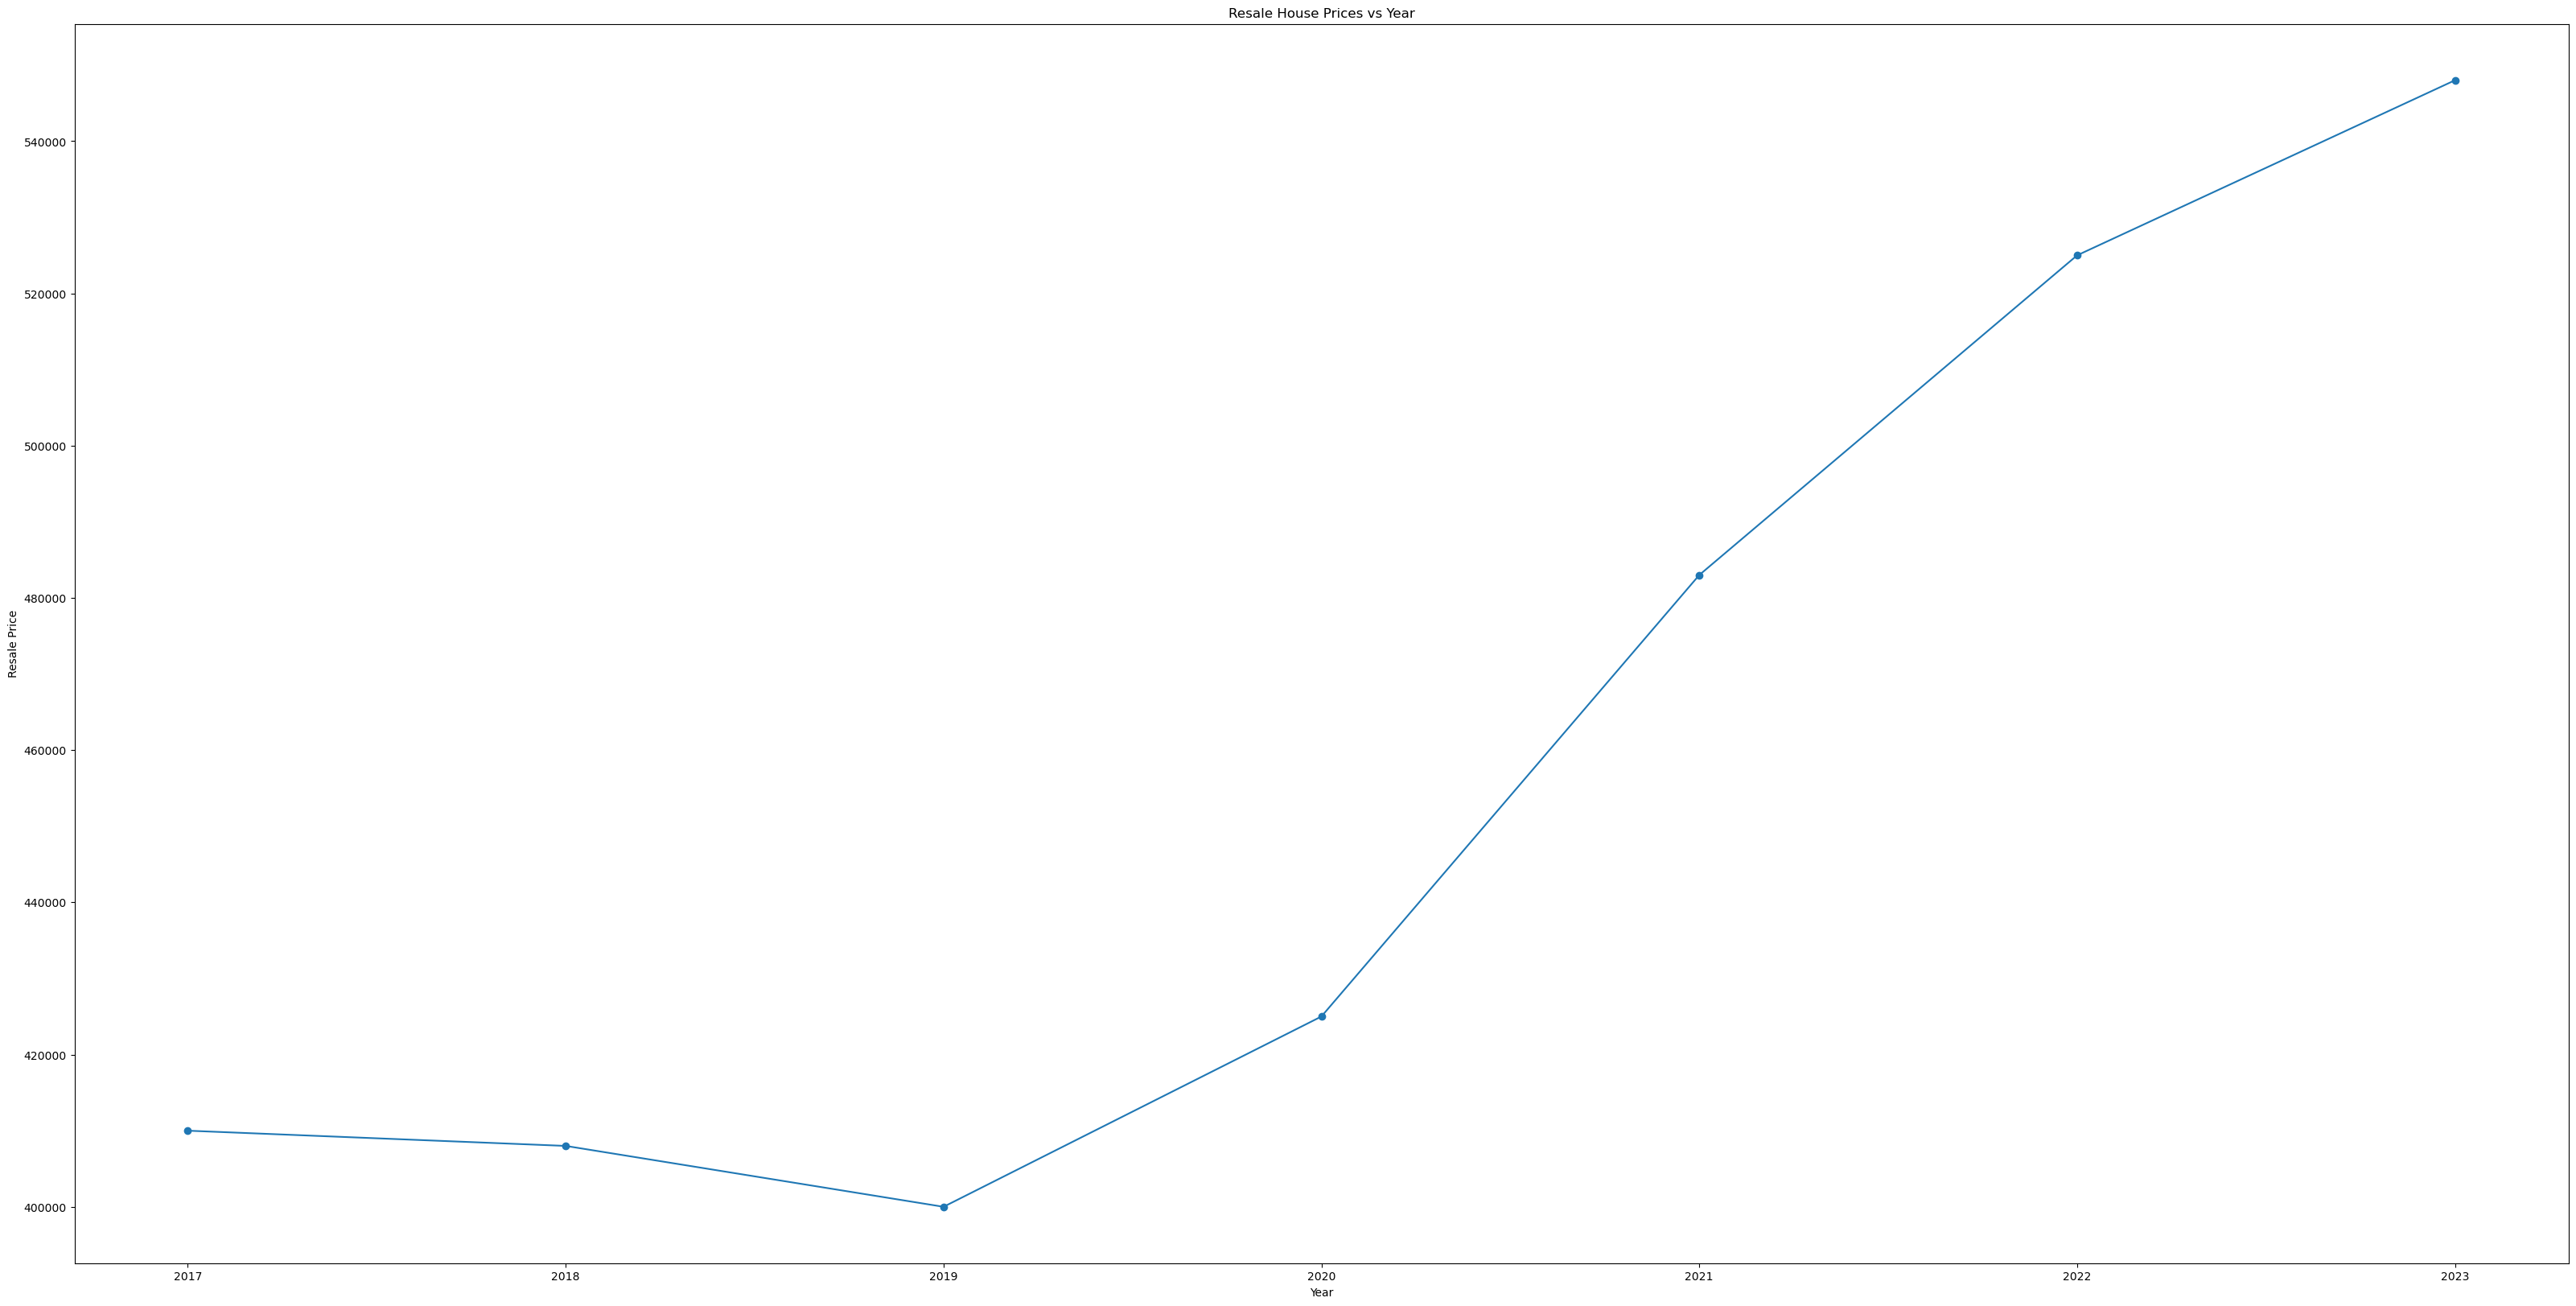

In [12]:
plt.figure(figsize=(40,20))
resale_hdb.groupby(resale_hdb['month'].dt.year)['resale_price'].median().plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.title('Resale House Prices vs Year')

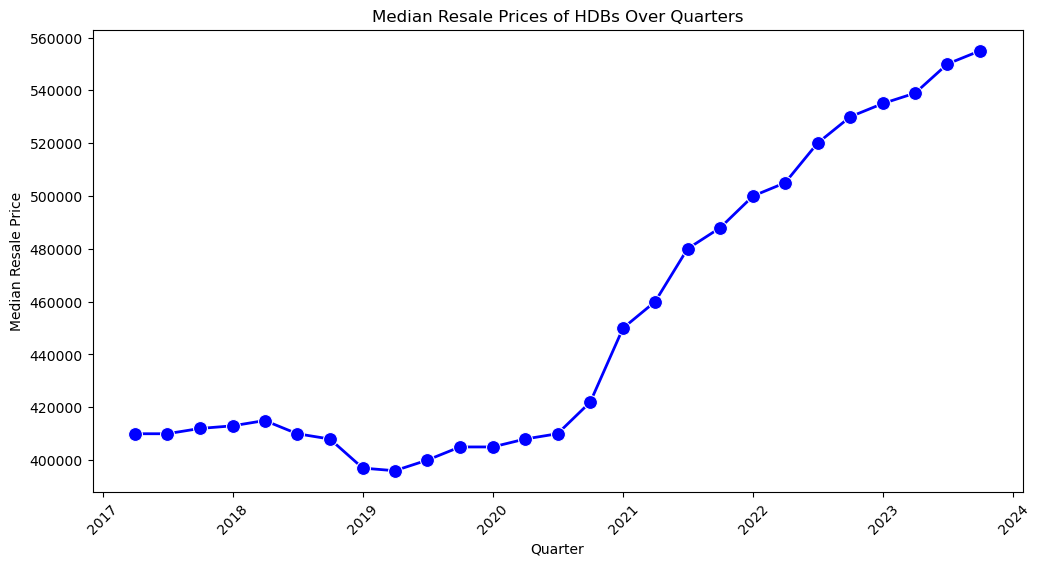

In [14]:
price_median = resale_hdb.resample('Q', on='month')['resale_price'].median().reset_index()

# Create a Seaborn line plot with the median price
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

line = sns.lineplot(x='month', y='resale_price', data=price_median, marker='o', markersize=10, color='blue', linestyle='-', linewidth=2)

# Customize the plot labels and title
plt.xlabel('Quarter')
plt.ylabel('Median Resale Price')
plt.title('Median Resale Prices of HDBs Over Quarters')

plt.show()


Text(0.5, 1.0, 'Median Resale Prices of HDBs Over Quarters')

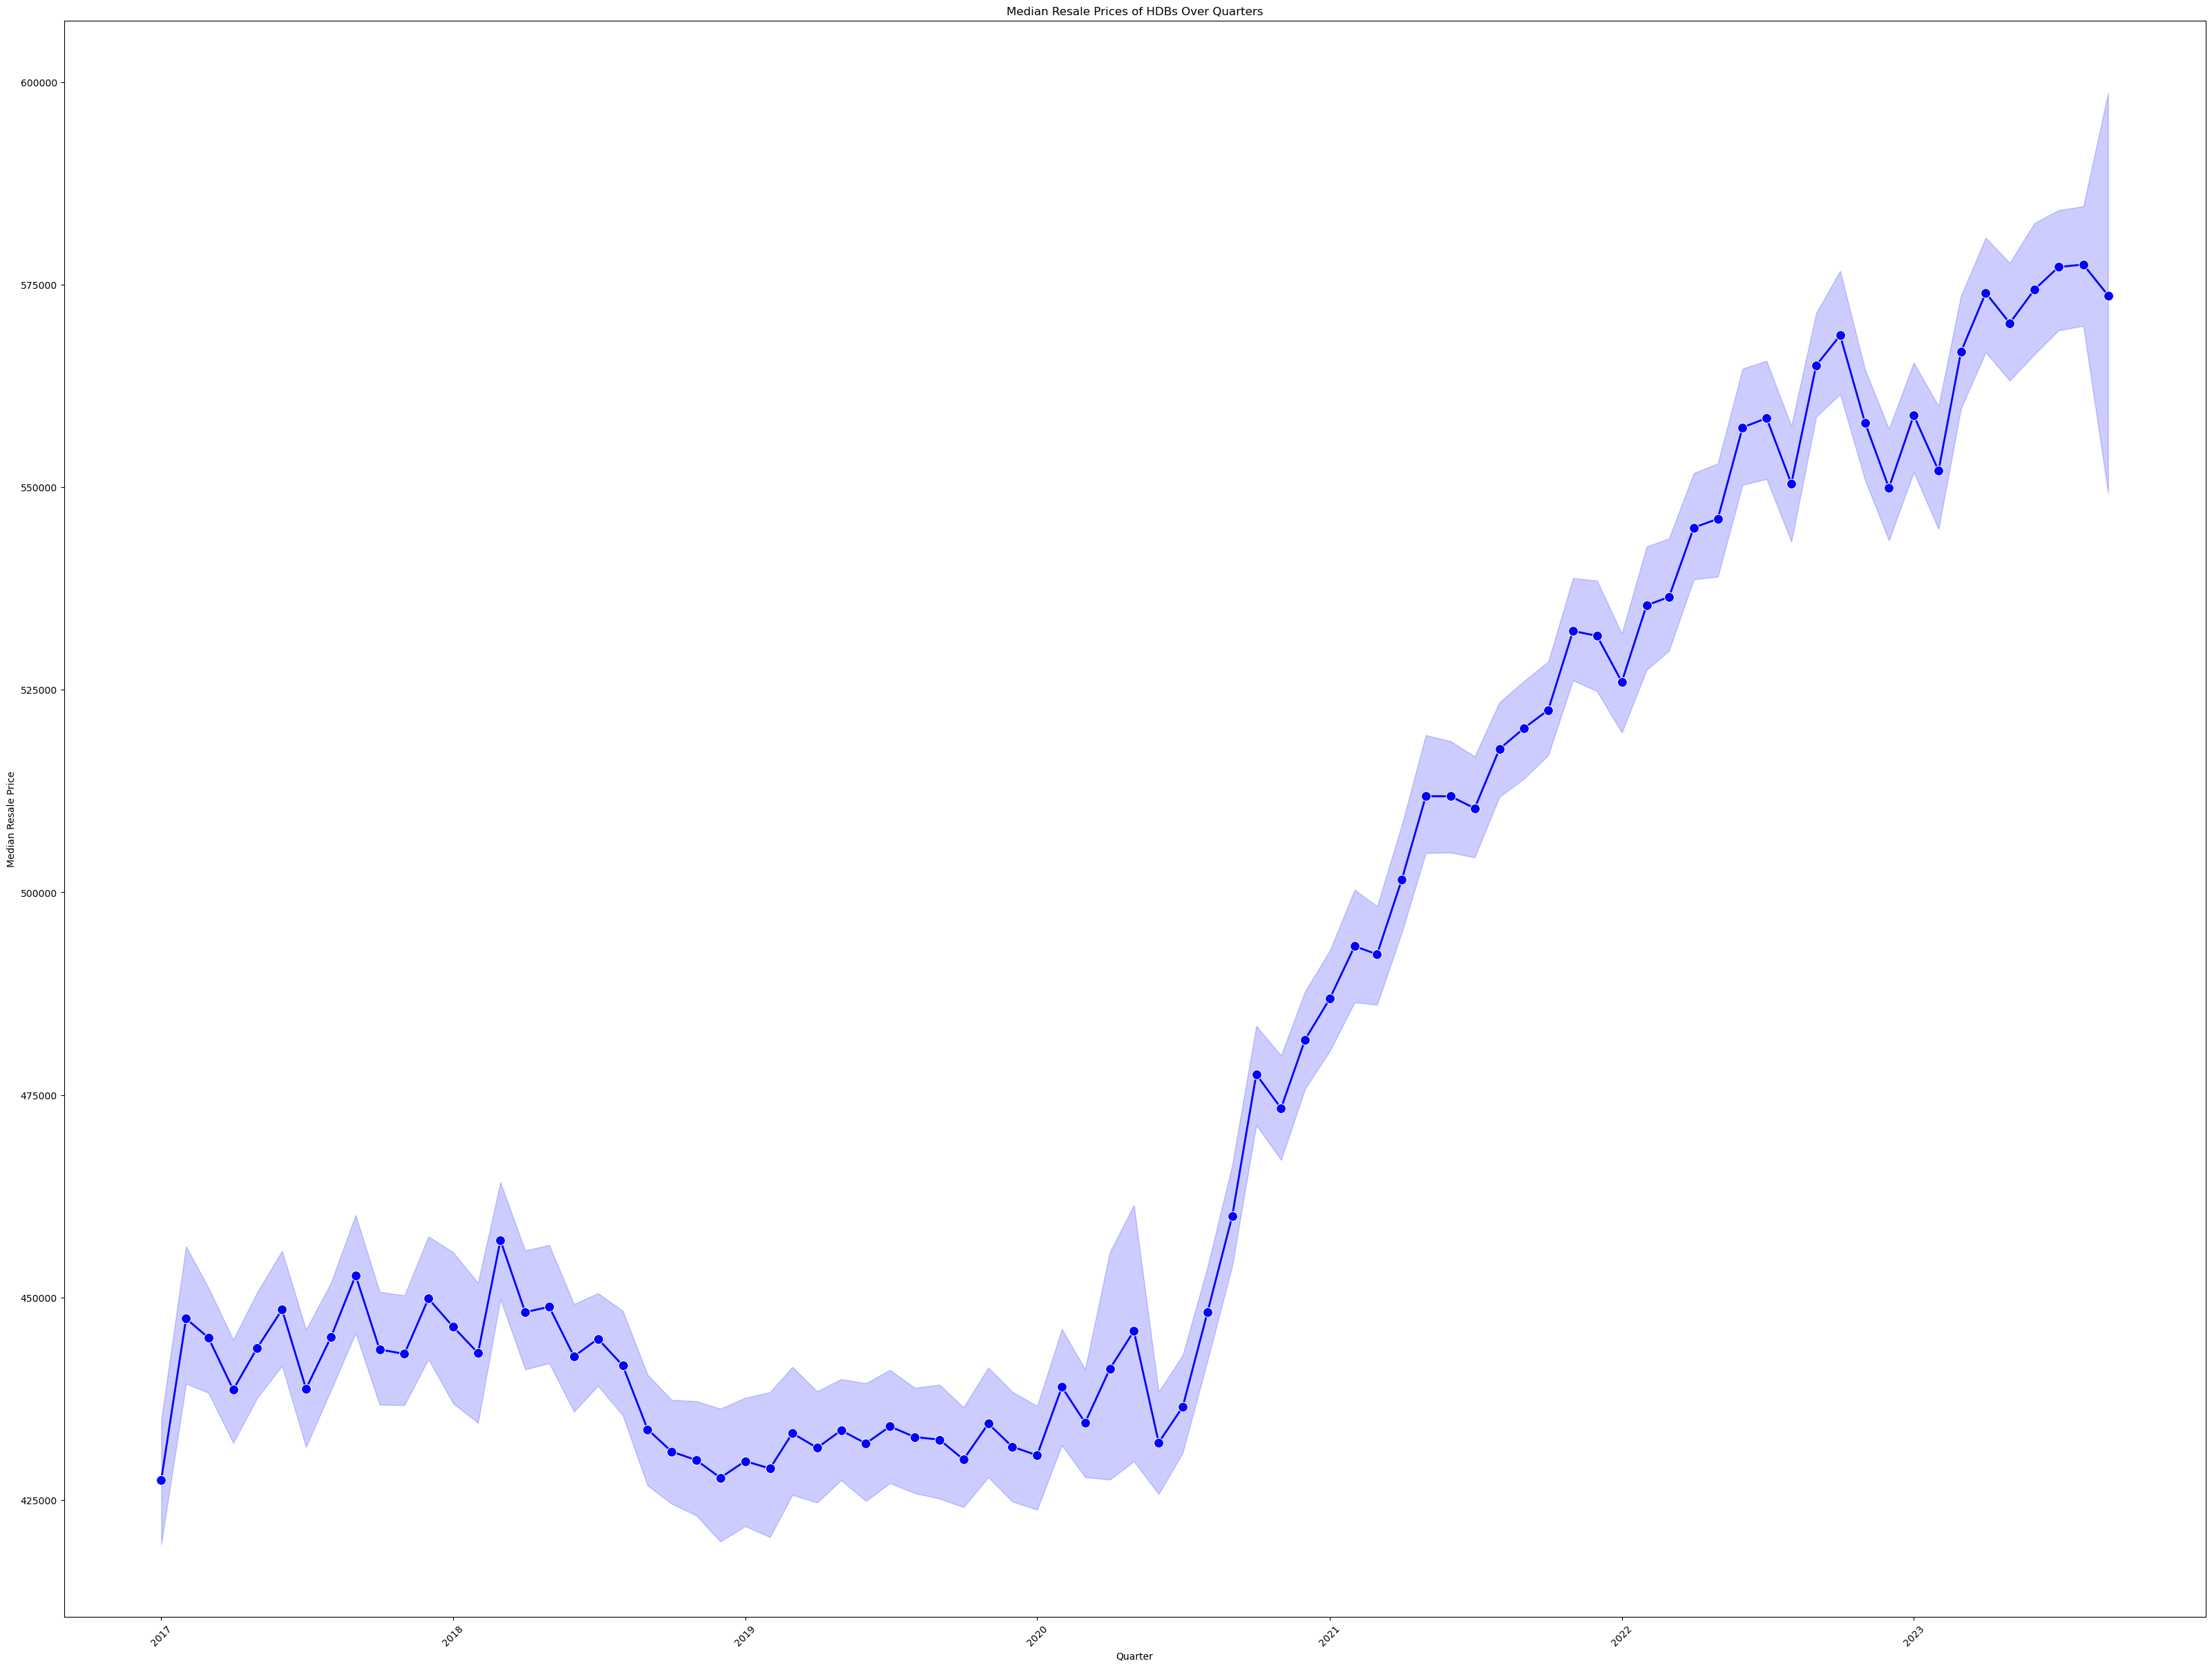

In [15]:
plt.figure(figsize=(40,30))
plt.xticks(rotation=45)  

sns.lineplot(x='month', y='resale_price', data=resale_hdb, marker='o', markersize=10, color='blue', linestyle='-', linewidth=2)

# Customize the plot labels and title
plt.xlabel('Quarter')
plt.ylabel('Median Resale Price')
plt.title('Median Resale Prices of HDBs Over Quarters')

In [17]:
median_prices = resale_hdb.groupby('month')['resale_price'].median().reset_index()
fig = px.line(median_prices, x = "month", y="resale_price", markers=True, title = "Resale Price vs Year by Months [2017-2023]")
fig.update_layout(width=1000, height=900)
fig.show()

## Compare Median Resale Flats Prices Across Towns


In [25]:
resale_hdb['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [90]:
region_dict = {
    'North': ['WOODLANDS', 'YISHUN', 'SEMBAWANG'],
    'East': ['BEDOK', 'PASIR RIS', 'TAMPINES', 'PUNGGOL', 'SIMEI', 'LOYANG', 'EASTWOOD', 'SIGLAP', 'JOO CHIAT', 'KATONG', 'KEMBANGAN', 'TELOK KURAU', 'MARINE PARADE', 'BEDOK RESERVOIR'],
    'West': ['JURONG WEST', 'JURONG EAST', 'TEBAN GARDENS', 'PIONEER', 'BOON LAY', 'BENCOOLEN', 'COMMONWEALTH', 'CLEMENTI', 'WEST COAST', 'CLEMENTI WEST', 'TOH GUAN', 'YUHUA', 'KEAT HONG', 'BUKIT BATOK', 'TOH TUCK', 'BUKIT TIMAH', 'HILLVIEW', 'DAIRY FARM', 'BUKIT PANJANG', 'CHOA CHU KANG'],
    'Central': ['ANG MO KIO', 'BISHAN', 'BRADDELL', 'MACRITCHIE', 'TOA PAYOH', 'SERANGOON', 'LORONG CHUAN', 'HOUYANG', 'BARTLEY', 'KOVT', 'NEX', 'BOON KENG', 'BALESTIER', 'GEYLANG', 'MOUNTVERNON', 'POTONG PASIR', 'POTONG', 'BOON KENG ROAD', 'GWARK', 'ST GEORGE', 'ST MICHAEL', 'WOODLEIGH', 'CENTRAL AREA','KALLANG/WHAMPOA'],
    'North-East': ['HOUGANG', 'TAMPINES', 'RIVIERA', 'FERNVALE', 'ANG MO KIO', 'BUANGKOK', 'SENGKANG', 'PUNGGOL', 'LOR HALUS', 'MATILDA', 'JALAN KAYU', 'SERANGOON', 'SIMON ROAD', 'PHOENIX', 'CARMICHAEL', 'KOVAN', 'KANG KAR', 'ANG MO KIO AVENUE', 'VEERASAMY', 'CHUAN HOON', 'KANG CHING', 'YIO CHU KANG', 'KOI', 'SERANGOON GARDEN'],
    'South' : ['BUKIT MERAH', 'QUEENSTOWN']
}

In [91]:
def map_town_to_region(town):
    for region, towns in region_dict.items():
        if town in towns:
            return region

In [92]:
resale_hdb['region'] = resale_hdb['town'].apply(map_town_to_region)

In [93]:
resale_hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1970-01-01 00:00:00.000001979,61 years 04 months,232000.0,Central
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001978,60 years 07 months,250000.0,Central
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001980,62 years 05 months,262000.0,Central
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1970-01-01 00:00:00.000001980,62 years 01 month,265000.0,Central
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001980,62 years 05 months,265000.0,Central


Text(0.5, 1.0, 'Median Prices by Region')

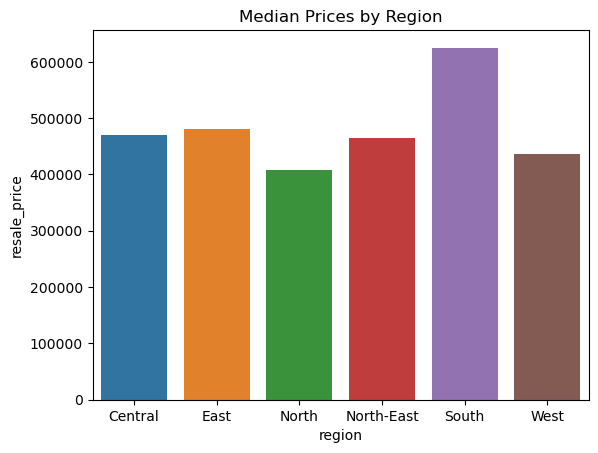

In [94]:
median_prices = resale_hdb.groupby('region')['resale_price'].median().reset_index()
sns.barplot(data=median_prices, x="region", y="resale_price").set_title('Median Prices by Region')


In [78]:
px.bar(median_prices, x="region", y="resale_price")

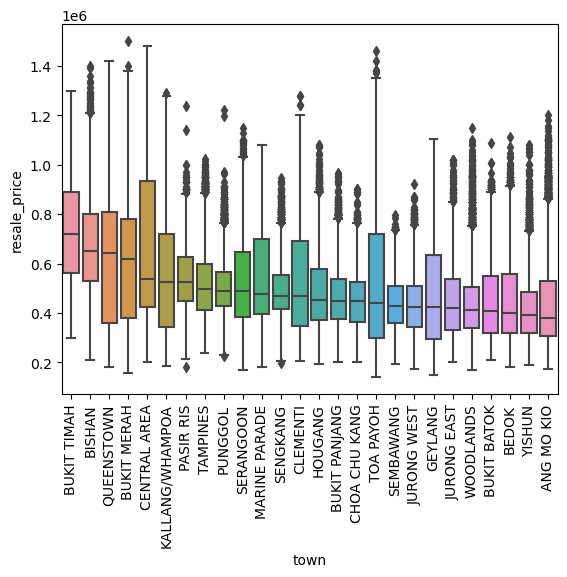

<Figure size 10000x3000 with 0 Axes>

In [79]:
sort_list = sorted(resale_hdb.groupby('town')['resale_price'].median().items(),key= lambda x:x[1], reverse = True)
order_list = [x[0] for x in sort_list ]
sns.boxplot(data = resale_hdb, x = 'town', y='resale_price', order=order_list)
plt.xticks(rotation='vertical')
plt.figure(figsize=(100, 30))
plt.show();

### The most expensive resale price is at Bukit Timah and the cheapest is in Ang Mo Kio

# Data Modelling

### Predict a resale flat price in Punggol in 2020

## Use this sample as a test
- Flat type: 4 ROOM
- Town: Yishun
- Flat Model: New Generation
- Storey Range: 10 to 12
- Floor Area (sqm): 91
- Lease Commence Date: 1984
- Resale Price: 550,800

In [35]:
resale_hdb['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

In [38]:
resale_hdb.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1970-01-01 00:00:00.000001979,61 years 04 months,232000.0,Central


In [39]:
test = pd.DataFrame([['YISHUN','4 ROOM','10 to 12',91,'New Generation', 1984, 550800]])

### We focus on 2020 transacted prices to remove the consideration of price inflation over time and make an assumption that the price variation within the year is not significant

- town,
- age (remaining_lease)
- flat_type
- and drop all other columns

### Feature Selection

In [49]:
resale_hdb[resale_hdb['remaining_lease']==0]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,region


In [46]:
df_2020 = resale_hdb[resale_hdb['month'].dt.year == 2020]
df_2020 = df_2020[['resale_price','remaining_lease','flat_type','town']]

In [47]:
df_2020.dtypes

resale_price       float64
remaining_lease     object
flat_type           object
town                object
dtype: object

## Feature Engineering

### Before building a model, we need to perform EDA:
- to identify data anomalies such as outliers and class imbalance that might affect the modeling;

- to verify model assumptions such as no severe multicollinearity.

In [153]:
resale_hdb.isna().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
region                 0
dtype: int64

In [118]:
resale_hdb.describe()

,floor_area_sqm,resale_price
count,160814.000000,1.608140e+05
mean,97.413738,4.866644e+05
std,24.047375,1.684352e+05
min,31.000000,1.400000e+05
25%,82.000000,3.628000e+05
50%,93.000000,4.550000e+05
75%,113.000000,5.800000e+05
max,249.000000,1.500000e+06


In [101]:
resale_hdb.duplicated().sum()


275

In [111]:
resale_hdb.drop_duplicates(keep='first', inplace=True)
resale_hdb.reset_index(drop=True, inplace=True)


In [112]:
resale_hdb.duplicated().sum()

0

In [165]:
data_encoded.iloc[:,11:]

,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
160810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
160811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
160812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Model building


In [161]:
features = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease'] + list(data_encoded.columns[11:])
X = data_encoded[features]
y = data_encoded['resale_price']

# Assuming 'data_encoded' contains the DataFrame with dummy-encoded 'town' columns
# Extract relevant features and target variable
features = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease'] + list(data_encoded.columns[11:])
X = data_encoded[features]
y = data_encoded['resale_price']

# Convert 'lease_commencement_date' to property age (in years)
current_year = datetime.now().year
X['lease_commence_date'] = current_year - pd.to_datetime(X['lease_commence_date']).dt.year

# Extract numeric part from 'remaining_lease' and convert to float
X['remaining_lease'] = X['remaining_lease'].str.extract('(\d+)').astype(float)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 7948423265.641065
R-squared (R2) Score: 0.7164265468222825


The R2 Score with a value of 0.7164265468222825 indicates that approximately 71.64% of the variance in resale prices can be explained by the features included in your model. This suggests a reasonably good fit, as R2 values closer to 1 are better. 

## Linearity Check

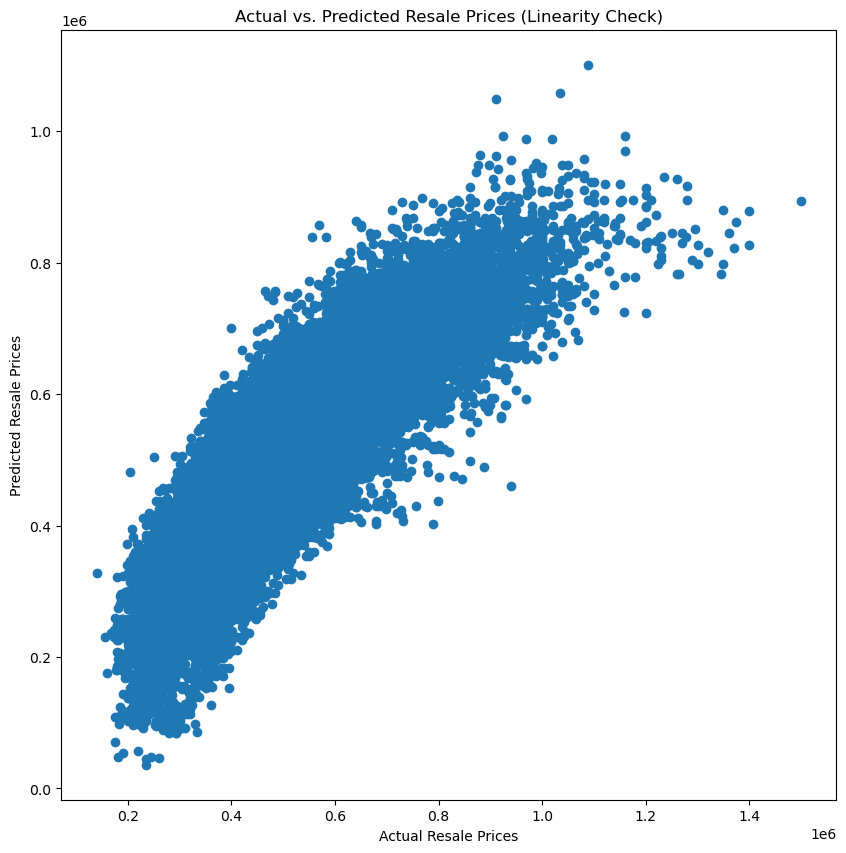

In [167]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Resale Prices")
plt.ylabel("Predicted Resale Prices")
plt.title("Actual vs. Predicted Resale Prices (Linearity Check)")
plt.show()

In our analysis, we performed a linearity check to assess the relationship between the predicted resale prices and the actual resale prices. The results indicate that there is a strong linear relationship between the predicted and actual resale prices. This means that our linear regression model is able to capture and approximate the relationship between the selected features and the resale prices in a linear manner.

The scatter plot of predicted vs. actual resale prices shows that the data points closely align along a diagonal line from the bottom-left to the top-right of the plot. This alignment demonstrates that our model's predictions are consistent with the actual resale prices, and it validates the suitability of our linear regression approach for this prediction task.

Overall, the strong linear relationship between predicted and actual resale prices is a positive outcome, suggesting that our model provides accurate predictions that closely follow the observed data trends."

In this description, you're highlighting the key findings of the linearity check, emphasizing the alignment of data points along a diagonal line in the scatter plot, and conveying the model's ability to capture the linear relationship effectively. This clear and concise communication can help stakeholders understand the model's performance in terms of linearity

## Homoscedasticity Check:



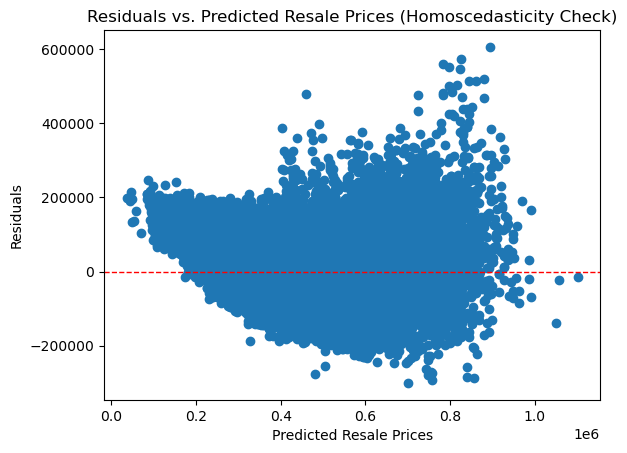

In [169]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Resale Prices")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Resale Prices (Homoscedasticity Check)")
plt.show()

In the scatterplot above, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.